In [39]:
from sklearn import datasets, tree, ensemble
from utils.tools import gen_Xgrid
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
sns.set_theme()

### Decision Tree Classifier

In [15]:
X,y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)
classifier = tree.DecisionTreeClassifier()
classifier.fit(X,y)

DecisionTreeClassifier()

Text(0, 0.5, 'x2')

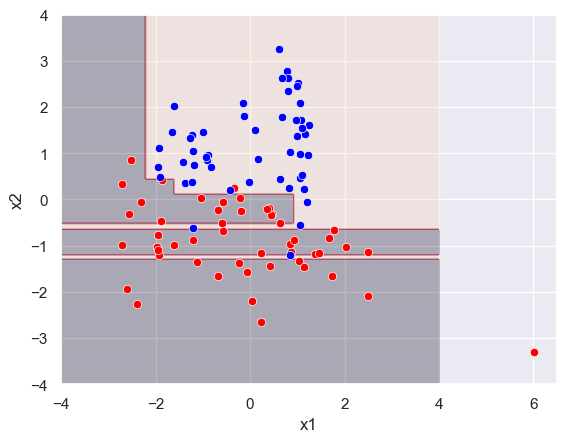

In [17]:
Xgrid, x1, x2 = gen_Xgrid(nx = 200, range=(-4,4))
classifications = classifier.predict(Xgrid).reshape([200,200])
fig, ax = plt.subplots()
contour = ax.contourf(x1,x2, classifications, alpha = 0.3)
sns.scatterplot(x = X[y==0,0], y = X[y==0,1], c = 'red')
sns.scatterplot(x = X[y==1,0], y = X[y==1,1], c = 'blue')
ax.set_xlabel('x1'); ax.set_ylabel('x2')

### Random Forest Classifier

Text(0, 0.5, 'x2')

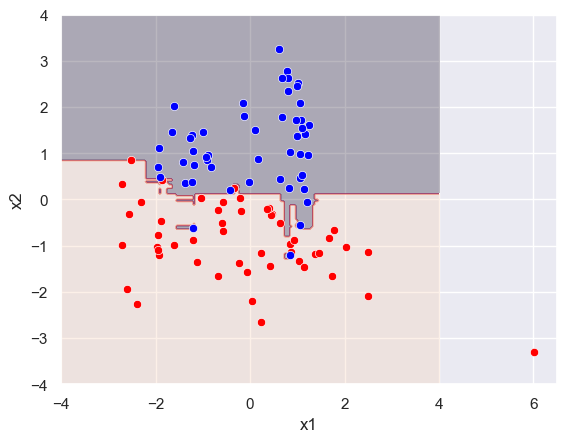

In [35]:
rf = ensemble.RandomForestClassifier(n_estimators=30, max_depth=20)
rf.fit(X,y)
# Predict proba returns probabilities for all classes, in our case since it's binary we can just take [:,0] and plot
classifications = rf.predict_proba(Xgrid)[:,0].reshape([200,200])
classifications[classifications <= 0.5] = 0; classifications[classifications > 0.5] = 1
fig, ax = plt.subplots()
contour = ax.contourf(x1,x2, classifications, alpha = 0.3)
sns.scatterplot(x = X[y==0,0], y = X[y==0,1], c = 'red', ax = ax)
sns.scatterplot(x = X[y==1,0], y = X[y==1,1], c = 'blue', ax = ax)
ax.set_xlabel('x1'); ax.set_ylabel('x2')

### Image Processing

(-0.5, 499.5, 374.5, -0.5)

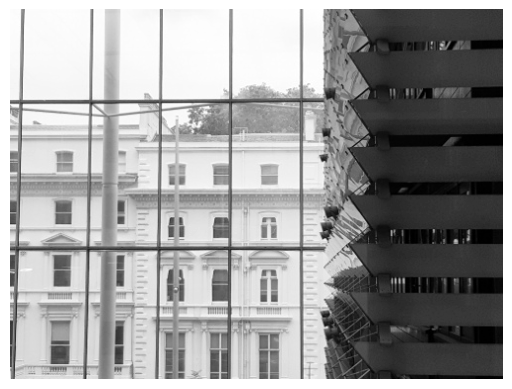

In [45]:
img = mpimg.imread('data/images/window.png')
# Just get red values
imgBw = np.squeeze(img[:,:,0])

npy, npx = imgBw.shape
plt.figure()
plt.imshow(imgBw, cmap = plt.cm.gray)
plt.axis('off')


### Fourier processing of the image

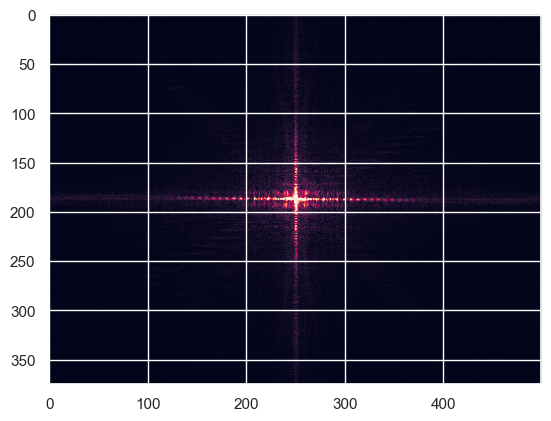

In [54]:
fim = np.fft.fft2(imgBw)
fim = np.fft.fftshift(fim)
plt.figure()
plt.imshow(np.abs(fim))
plt.colorbar
plt.clim(0,1e3)

(-0.5, 499.5, 374.5, -0.5)

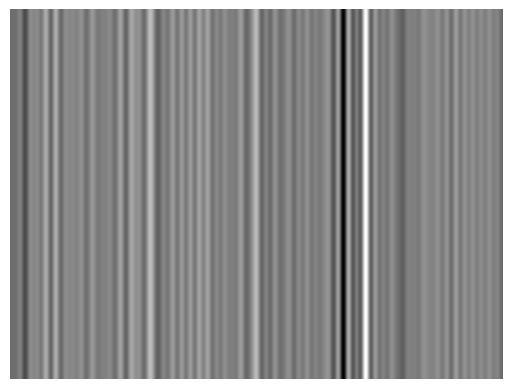

In [65]:
fim2 = fim.copy()
#everything except the first row set to 0, everything in the first row set to zero except the first 61 points and last 60 points
fim2[1:npy,:] = 0; fim2[0, 61:npx-60] = 0
img2 = np.real(np.fft.ifft2(fim2))
plt.figure()
plt.imshow(img2, cmap = plt.cm.gray)
plt.axis('off')

(-0.5, 499.5, 374.5, -0.5)

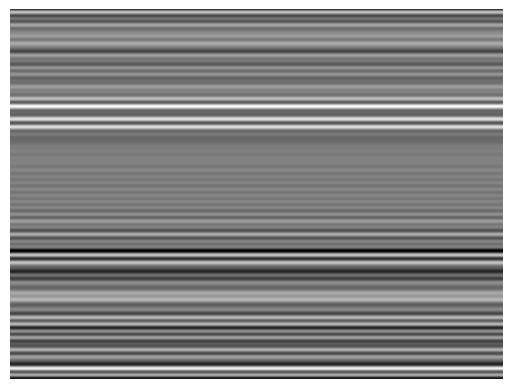

In [64]:
fim2 = fim.copy()
#everything except the first column set to 0, everything in the first column set to zero except the first 61 points and last 60 points
fim2[:,1:npx] = 0; fim2[61:npy-60,0] = 0
img2 = np.real(np.fft.ifft2(fim2))
plt.figure()
plt.imshow(img2, cmap = plt.cm.gray)
plt.axis('off')

### Edge detection

(-0.5, 498.5, 373.5, -0.5)

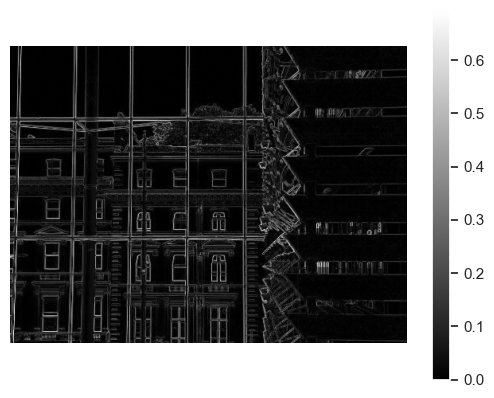

In [72]:
# We truncate these as the gradients will return arrays of different shapes, we need the same shape for edgeIm calc
diffx = np.diff(imgBw, axis = 1)[0:npy -1, :]
diffy = np.diff(imgBw, axis = 0)[:, 0:npx -1]
# Calculate average gradient as a measure for sharpness of transition for each pixel
edgeIm = np.sqrt(diffx**2+diffy**2)
plt.figure()
plt.imshow(edgeIm, cmap = plt.cm.gray)
plt.colorbar()
plt.axis('off')

### Thresholding

(-0.5, 498.5, 373.5, -0.5)

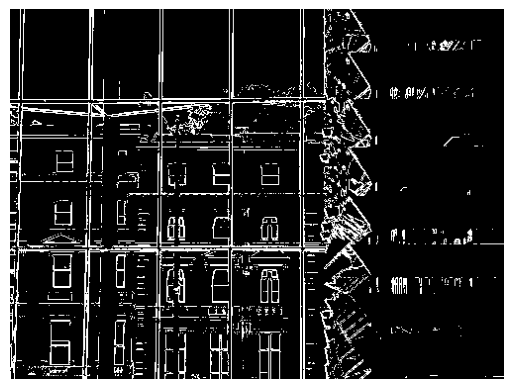

In [88]:
threshold = 0.15
edgeThresh = (edgeIm > threshold).astype('int') # this astype int allows you to convert from bool to int
plt.figure()
plt.imshow(edgeThresh, cmap = plt.cm.gray)
plt.axis('off')